 Written by Federica B. Bianco @fedhere
 NYU CUSP PUI

 Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize

    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## choose which distributions to use 

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which mean to give it

In [3]:
mymean = 100

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [4]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


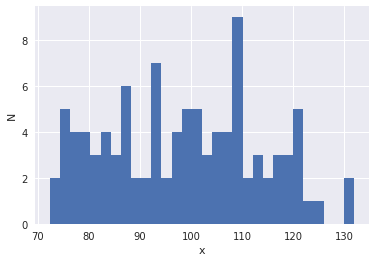

In [5]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 98.48, standard deviation: 14.90


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [29]:
# mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
mysize = np.random.choice(range(2000), 100, replace=False)
print (sort(mysize), mysize.shape)

[  86  111  131  135  153  161  170  176  198  203  219  225  252  256  277
  283  333  339  343  349  365  485  491  506  508  523  529  538  558  565
  569  582  594  643  699  704  711  718  726  768  774  790  804  817  818
  844  850  858  871  900  929  957  965 1052 1094 1115 1126 1147 1151 1159
 1162 1166 1167 1220 1288 1319 1336 1351 1358 1395 1445 1470 1471 1473 1538
 1598 1601 1605 1610 1611 1616 1623 1629 1643 1676 1689 1718 1721 1731 1750
 1761 1768 1798 1840 1855 1904 1910 1921 1925 1928] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


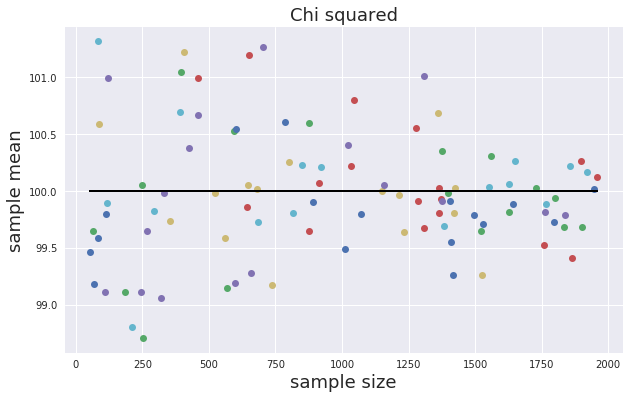

In [8]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: [describe what you see and how it relates to the law of large numbers]

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0.5,1,'Chisquare Sample Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


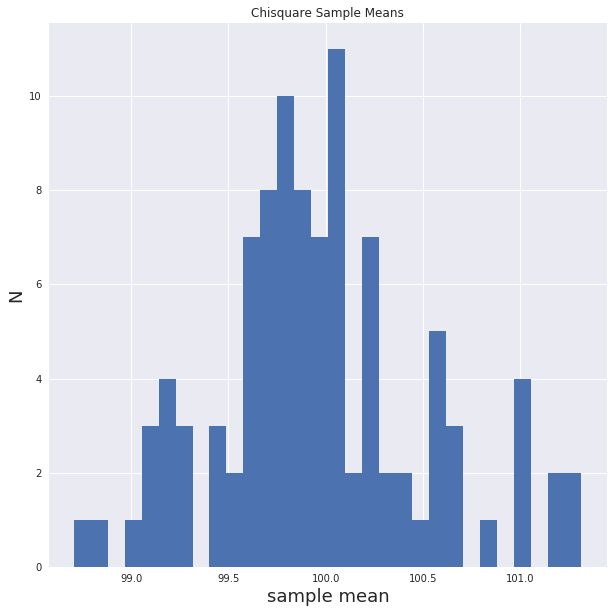

In [9]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Chisquare Sample Means')

## Figure 3: [...]

# Do it for the Normal distribution


In [10]:
# np.random.normal?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


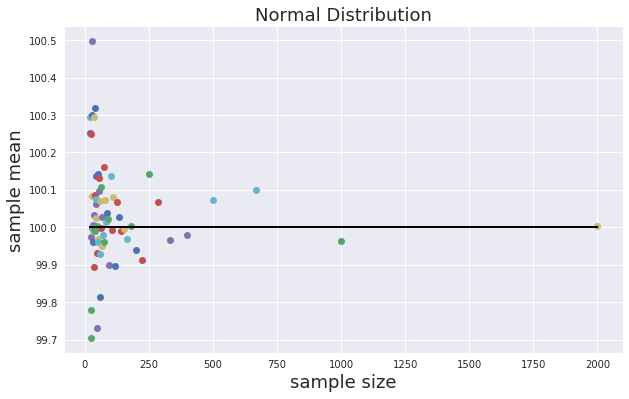

In [11]:
dist='gaus'

mysize = (2000 / (np.array(range(1, 100)))).astype(int)
md[dist] = {} 

for n in mysize:
    md[dist][n] = np.random.normal(df, size = n)
    
md[dist]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[dist]:
    if not type(nn) == str:
        md[dist]['means'][nn] = md[dist][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[dist]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

In [12]:
len(md['gaus']['means'])

69

Text(0.5,1,'Normal Sample Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


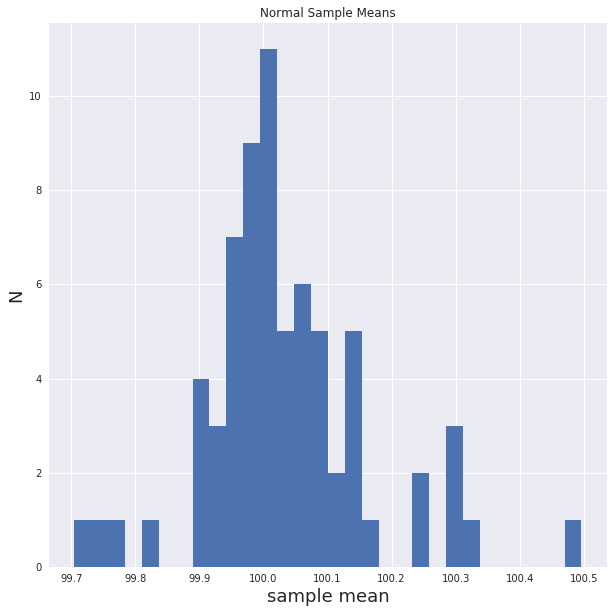

In [13]:
allmeans = list(md[dist]['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Normal Sample Means')

# Do it for the Poisson distribution

In [14]:
# np.random.poisson?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


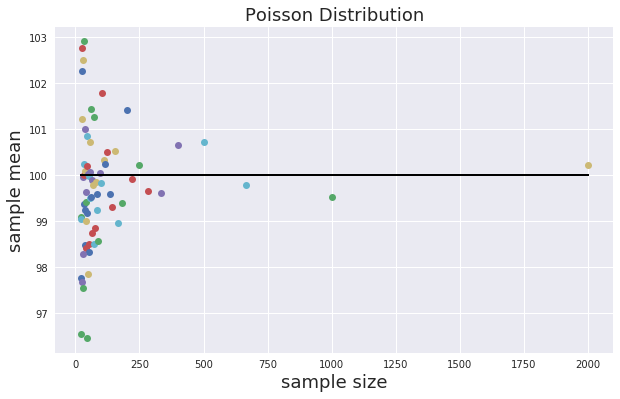

In [15]:
dist='pois'

mysize = (2000 / (np.array(range(1, 100)))).astype(int)
md[dist] = {} 

for n in mysize:
    md[dist][n] = np.random.poisson(df, size = n)
    
md[dist]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[dist]:
    if not type(nn) == str:
        md[dist]['means'][nn] = md[dist][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[dist]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Text(0.5,1,'Poisson Sample Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


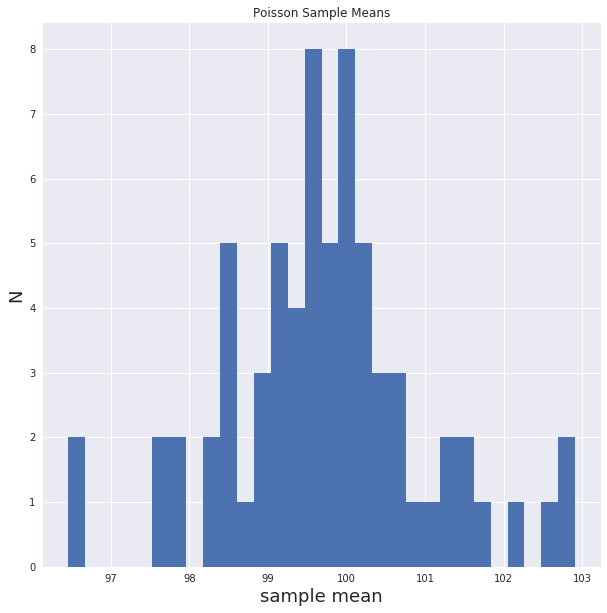

In [16]:
allmeans = list(md[dist]['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Poisson Sample Means')

# Do it for the Binomial distribution

In [17]:
# np.random.binomial?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


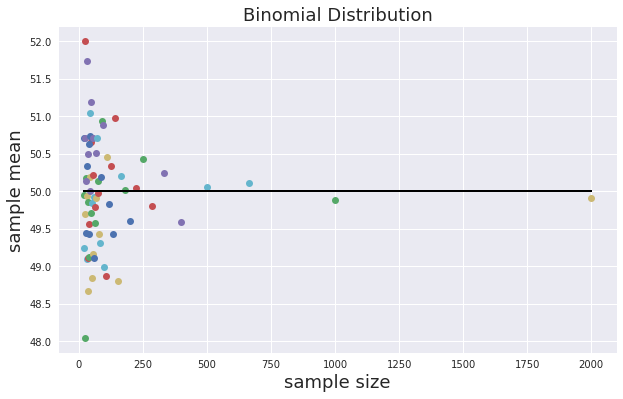

In [18]:
dist='binomial'

mysize = (2000 / (np.array(range(1, 100)))).astype(int)
md[dist] = {} 

for n in mysize:
    md[dist][n] = np.random.binomial(df, 0.5, size = n)
    
md[dist]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[dist]:
    if not type(nn) == str:
        md[dist]['means'][nn] = md[dist][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[dist]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [50, 50], 'k')

Text(0.5,1,'Binomial Sample Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


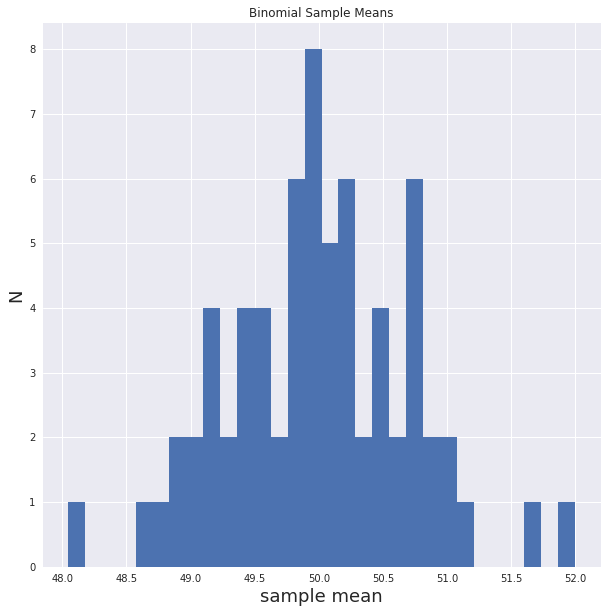

In [19]:
allmeans = list(md[dist]['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Binomial Sample Means')

# Do it for another distribution

In [20]:
# np.random.lognormal?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


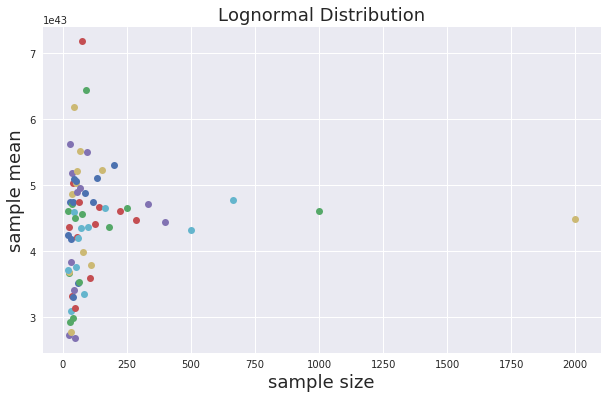

In [21]:
import math
d=math.log(df)
dist='lnormal'

mysize = (2000 / (np.array(range(1, 100)))).astype(int)
md[dist] = {} 

for n in mysize:
    md[dist][n] = np.random.lognormal(df, size = n)
    
md[dist]['means'] = {}
ax_plot = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[dist]:
    if not type(nn) == str:
        md[dist]['means'][nn] = md[dist][nn].mean()
        #and plot it
        ax_plot.plot(nn, md[dist]['means'][nn], 'o')
        ax_plot.set_xlabel('sample size', fontsize=18)
        ax_plot.set_ylabel('sample mean', fontsize=18)
        ax_plot.set_title('Lognormal Distribution', fontsize=18)
#         ax_plot.plot([min(mysize), max(mysize)], [d, d], 'k')

Text(0.5,1,'Lognormal Sample Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


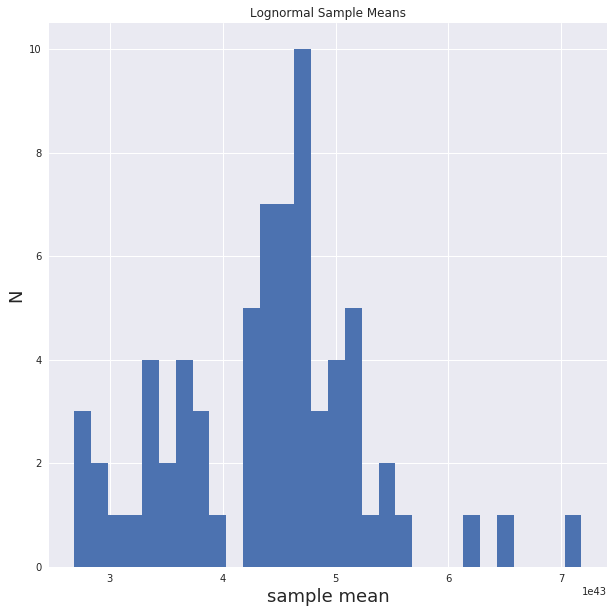

In [22]:
allmeans = list(md[dist]['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Lognormal Sample Means')

## Plotting the distribution of all sample means

In [26]:
md['binomial']['means'].values()

dict_values([49.428571428571431, 50.659574468085104, 50.978873239436616, 49.597499999999997, 49.25, 50.714285714285715, 49.954545454545453, 48.043478260869563, 50.708333333333336, 48.803921568627452, 49.692307692307693, 49.444444444444443, 50.178571428571431, 50.105105105105103, 51.733333333333334, 49.935483870967744, 49.09375, 50.333333333333336, 49.852941176470587, 49.114285714285714, 50.5, 48.675675675675677, 50.204819277108435, 49.435897435897438, 49.125, 49.560975609756099, 50.0, 50.186046511627907, 51.045454545454547, 50.733333333333334, 49.717391304347828, 49.810526315789474, 51.1875, 48.840000000000003, 49.843137254901961, 50.71153846153846, 50.016574585635361, 50.222222222222221, 50.709090909090911, 49.157894736842103, 49.931034482758619, 49.116666666666667, 49.58064516129032, 49.796875, 50.515151515151516, 49.911764705882355, 50.718309859154928, 49.604999999999997, 50.135135135135137, 49.973684210526315, 50.24024024024024, 49.4375, 49.313253012048193, 50.186046511627907, 50.9

In [31]:
# df_all = list(md[x]['means'].values() for x in md)
l_all=[]
[l_all.extend(list(md[x]['means'].values())) for x in md]
len(l_all)

376

In [33]:
mean=np.array(l_all).mean()
std=np.array(l_all).std()
